# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
#Pymaceuticals Inc. Analysis
#The executive team has tasked me with generating all of the tables and figures needed for the technical report of the 
#clinical study. They have also asked for a top-level summary of the study results.
#We combined the data sheets into a combined data frame and then created a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen.
#A duplicate mouse was discovered and removed from the data set for analysis.
#Our bar charts reflect the total number of rows (Mouse ID/Timepoints) for each drug regimen and reflect comparable
#volumes of data collected for each of the drug regimens.
#Our pie chart shows the distribution of female (49%) versus male mice (51%), for a nearly equal divide between those 2 
#sex identifiers of mice.
#We then dug further into the results of 4 highlighted drug regimens, Capomulin, Ramicane, Infubinol, and Ceftamin, and found
#only Infubinol had identifiable data outliers when we reviewed the final tumor volume. Those are reflected on the box plot 
#graphs
#Ramicane and Infubinol reflect a Normal distribution with the whisker box plots, with Capomulin and Ramicane showing the
#lowest quantity of Tumor Volume. 
#We isolated the information to review Capomulin's impact on an individual mouse and found the individual mirrored the
#larger group information. We would recommend further investigation into these 2 lowest distributions
#treatment remedies for further analysis.
#We completed the analysis with scatter plot and  regression and correlation graphs. The regression shows a positive 
#relationship between the weight of the mouse and the average tumor volume. This resulted in The correlation between mouse 
#weight and the average tumor volume being 0.84, which is fairly close to 1, so we would accept this correlation is a 
#good indicator. We would recommend reviewing the impacts of each treatment plan with the varying mouse weights for
#future analysis as well.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mice_df = pd.merge(mouse_metadata, study_results,
                                 how='right', on="Mouse ID")
combined_mice_df.head()

# Display the data table for preview
combined_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice

Total_Mice = combined_mice_df["Mouse ID"].nunique()

Total_Mice



249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Dup_Mouse = combined_mice_df.loc[combined_mice_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
Dup_Mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Dup_Mouse_DataFrame = combined_mice_df.loc[combined_mice_df["Mouse ID"]=="g989", :]
Dup_Mouse_DataFrame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_DataFrame = combined_mice_df[combined_mice_df['Mouse ID'].isin(Dup_Mouse)==False]
Clean_DataFrame 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice in the clean DataFrame.
New_Mice = Clean_DataFrame["Mouse ID"].nunique()

New_Mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mice_Mean = Clean_DataFrame.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
Mice_Median = Clean_DataFrame.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
Mice_Variance = Clean_DataFrame.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
Mice_Std_Dev = Clean_DataFrame.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
Mice_Std_SEM = Clean_DataFrame.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

Mice_Stat = pd.DataFrame({"Mean Tumor Volume": Mice_Mean,
                          "Median Tumor Volume": Mice_Median,
                          "Tumor Volume Variance": Mice_Variance,
                          "Tumor Volume Std. Dev.": Mice_Std_Dev,
                          "Tumor Volume Std. Err": Mice_Std_SEM})
Mice_Stat



C:\Users\jwlem\AppData\Local\Temp\ipykernel_17892\454236414.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Mice_Mean = Clean_DataFrame.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
C:\Users\jwlem\AppData\Local\Temp\ipykernel_17892\454236414.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Mice_Median = Clean_DataFrame.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
C:\Users\jwlem\AppData\Local\Temp\ipykernel_17892\454236414.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either spec

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Advanced_Mice = Clean_DataFrame.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
Advanced_Mice

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

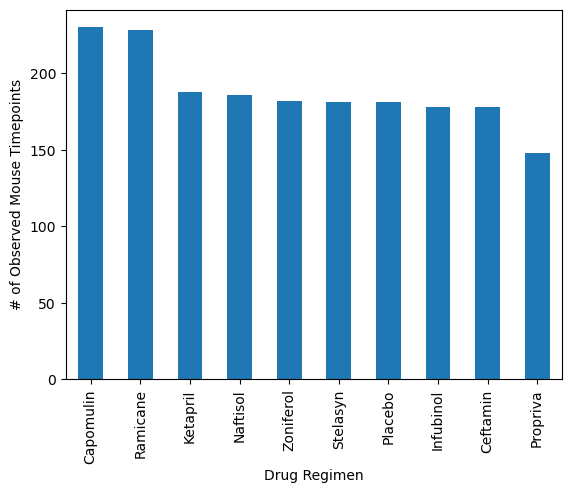

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Bar_Mice = Clean_DataFrame["Drug Regimen"].value_counts()

Plot_Pandas = Bar_Mice.plot.bar(color='tab:blue')
# Set a Title and labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

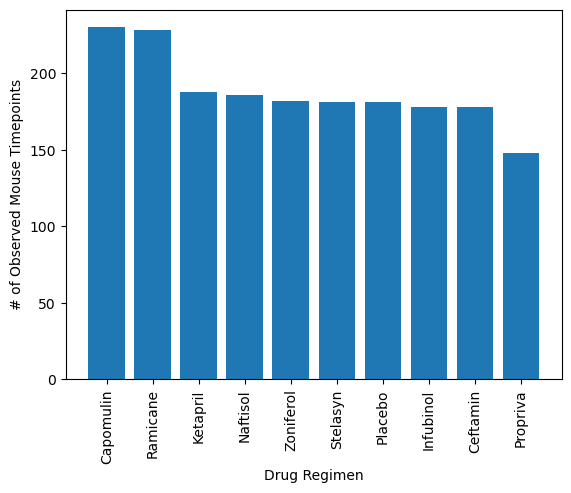

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = Bar_Mice.index.values
y_axis = Bar_Mice.values

plt.bar(x_axis, y_axis,color='tab:blue')

# Set a Title and labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

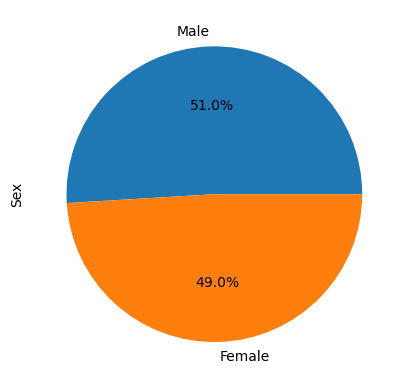

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Pie_Mice = Clean_DataFrame["Sex"].value_counts()

Pie_Mice.plot.pie(autopct="%1.1f%%")

plt.show


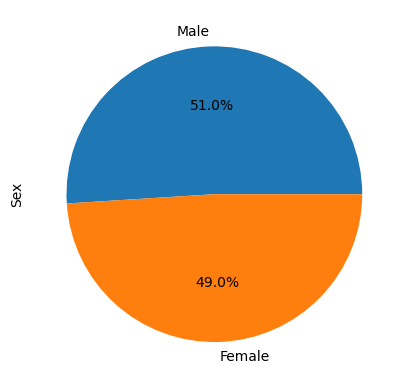

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male","Female"]
title='Sex'

# The values of each section of the pie chart
sizes = [51,49]

# The colors of each section of the pie chart
colors = ["tab:blue", "tab:orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")

plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Tumor_Volume =combined_mice_df.groupby(["Mouse ID"]).max()
Tumor_Volume_reset = Tumor_Volume.reset_index()


# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Data_Merge = Tumor_Volume_reset[['Mouse ID', 'Timepoint']].\
             merge(combined_mice_df,on=['Mouse ID','Timepoint'], how = "left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
def treatments(regimen):
    Data = Data_Merge.loc[Data_Merge["Drug Regimen"] == regimen]['Tumor Volume (mm3)']

# Create empty list to fill with tumor vol data (for plotting)
    Capomulin = []
    Ramicane = []
    Infubinol = []
    Ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds


    quartiles = Data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = Data.loc[(Data < lower_bound) | (Data > upper_bound)]
    
    print(f"{regimen}'s potential outliers: {outliers}")
    return Data
  
capomulin = treatments("Capomulin")
ramicane = treatments("Ramicane")
infubinol = treatments("Infubinol")
ceftamin = treatments("Ceftamin")   


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


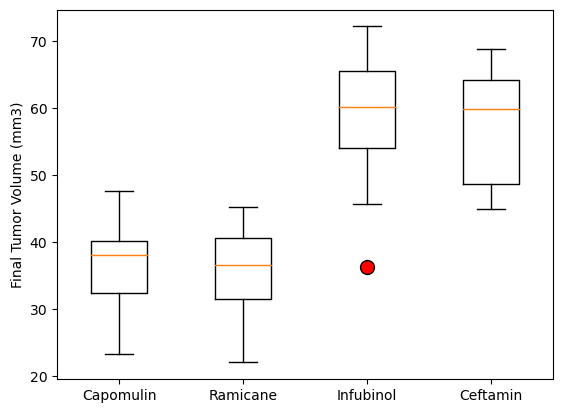

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
marker = dict(markerfacecolor = "red", markersize = 10)

plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops=marker)

plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

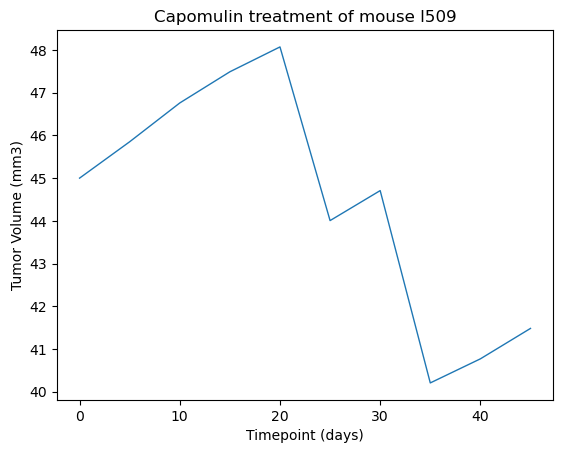

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulindf = Clean_DataFrame.loc[Clean_DataFrame["Drug Regimen"]=="Capomulin", :]

single_mouse = capomulindf.loc[capomulindf["Mouse ID"] == "l509", :]
single_mouse.head()

xaxis = single_mouse["Timepoint"]
yaxis = single_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()

plt.title('Capomulin treatment of mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')

plt.plot(xaxis, yaxis, linewidth = 1, color ="tab:blue")
plt.show()

C:\Users\jwlem\AppData\Local\Temp\ipykernel_17892\1083020559.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AvgVol = capomulindf.groupby(['Mouse ID']).mean()


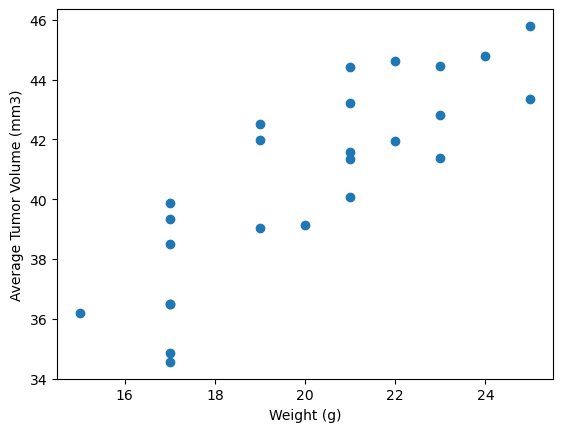

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
AvgVol = capomulindf.groupby(['Mouse ID']).mean()
markersize = 8
plt.scatter(AvgVol['Weight (g)'], AvgVol['Tumor Volume (mm3)'], color = "tab:blue")

plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


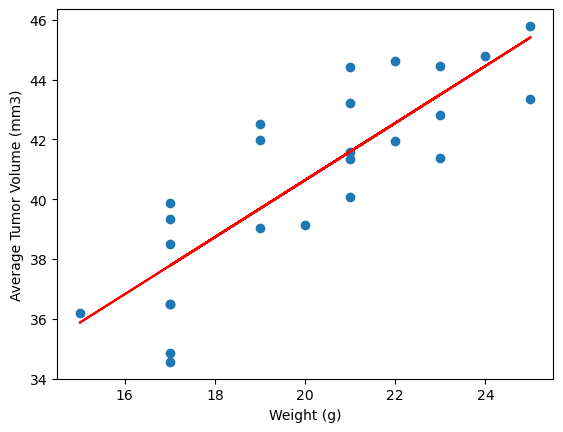

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Correlation = st.pearsonr(AvgVol['Weight (g)'], AvgVol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(Correlation[0], 2)}")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(AvgVol["Weight (g)"],AvgVol["Tumor Volume (mm3)"])
regress = AvgVol["Weight (g)"]* slope + intercept

plt.scatter(AvgVol['Weight (g)'], AvgVol['Tumor Volume (mm3)'], color = "tab:blue")
plt.plot(AvgVol['Weight (g)'], regress, color = "red")

plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

plt.show()